Deutsch Josza algorithm 
https://medium.com/quantum-untangled/the-deutsch-jozsa-algorithm-math-circuits-and-code-quantum-algorithms-untangled-f3b28be4cfd3

this is for n qubits IN QISKIT - in its current form, it works! works even for 30+ qubits 


repeat in qasm. 

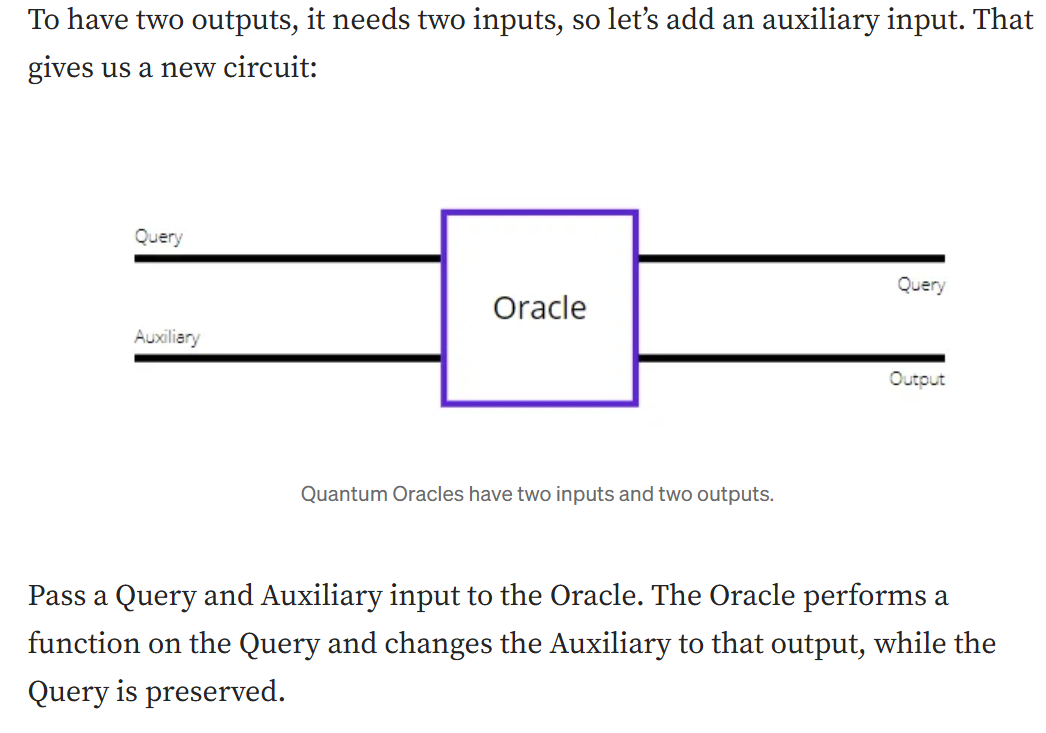


In [1]:
import qiskit
from qiskit import *
from qiskit_aer import AerSimulator
import matplotlib as plt 
from random import choice, randint 
 

First of all we should input the values to the Oracle - two values, the Query and the Oracle 
right now we will use 3 qubits, but this may be changed to however many.

In [2]:
n = 3 #number of qubits involved, (size of the Query, not including the auxiliary (the one we use phase kickback for))
djc = qiskit.QuantumCircuit(n+1, n) #3 qubits + 1 auxiliary, and 3 classical bits for measurement

#now we need to place our Query bits into a superposition by looping through the Query and applying H gates to each one
#to do this we loop through all numbers between 0 and 'n' 

for i in range(0, n):
    djc.h(i)

djc.x(n)
djc.h(n)

djc.barrier()
#djc.draw('mpl')
  


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(<Qubit register=(4, "q"), index=0>, <Qubit register=(4, "q"), index=1>, <Qubit register=(4, "q"), index=2>, <Qubit register=(4, "q"), index=3>), clbits=())

THE ORACLE 
Here, we have 3 cases to choose from - constant0, constant1, and Balanced Oracles 

In [ ]:
#HOW TO CODE A BALANCED ORACLE
        #each time you apply a CX gate from query to auxiliary, you flip the auxiliary if the query bit is 1. 
        #however if your query is made of 3 bits (e.g. |001>), the CX gate applies to each of these consecutively
        #CX|001> = CX|0>CX|0>CX|1>
        #So if only one of the Query bits is 1, the auxiliary will flip once and remain that way
        #if the query has 2 bits that are 1, the auxiliary will flip twice and remain in original state
        #HENCE! an even number of bits in the 1 state cause CX to cancel out their effect on auxiliary, and odd numbers cause it to be flipped 


        #SO, WE NEED TO MAKE THE QUERY!
        #for our query with 3 bits (n=3), there are 8 possible combinations of bits with 4 having even number 1s and 4 having odd number of 1s
        #hence half of them, when applied to auxiliary will return 0 and half will return 1. 

        #firstly we need to decide which qubits to randomly flip (in the query before sending it off into the oracle). 
        # we'll do this by randomly creating a n-digit binary string 
        #in this string, we will take 1s as an instruction to flip and 0 as an instruction not to 

In [3]:
def Oracle(djc, n):
    oracle_type = choice(['Constant0', 'Constant1', 'Balanced'])
    if oracle_type == 'Balanced':
        a = randint(1, 2**n -1)
        a_bits = format(a, f'0{n}b')
        for i, bit in enumerate(a_bits): 
            if bit == '1':
                djc.cx(i, n)
    
    elif oracle_type == 'Constant0':
        djc.barrier()
        
    elif oracle_type == 'Constant1':
        djc.x(n) #flip auxiliary
        djc.barrier()
        pass
    return djc, oracle_type
 

Oracle type:  Constant1


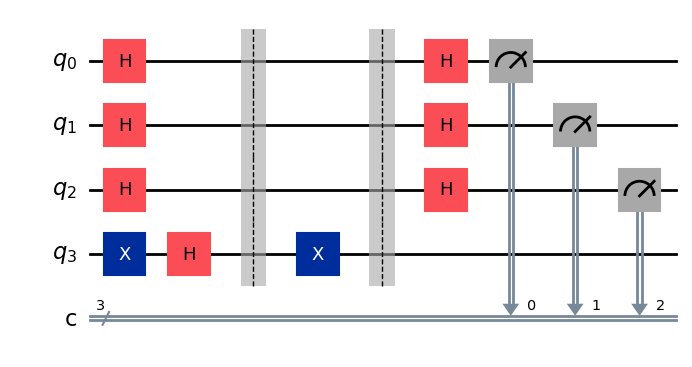

In [4]:
djc, oracle_type = Oracle(djc, n)
print('Oracle type: ', oracle_type)

#djc.draw('mpl')

for qbit in range(0, n):
    djc.h(qbit) #apply Hadamard gates to each qubit 

for qbit in range(0, n):
    djc.measure(qbit, qbit) #measure each qbut onto respective bit)

djc.draw('mpl')
 

expected behaviour: if the oracle is balanced, then the measurement is NOT 000. If the oracle is Constant0 or Constant1, the measurement IS 000

In [10]:
#simulation and retrieval of results
sim = AerSimulator(method='matrix_product_state')
job = sim.run(djc, shots=1, memory=True)
result = job.result()
measurements = result.get_memory() #we only have one shot, so we take the first (and only) element of the list of measurements, which is a string of 0s and 1s representing the state of the query qubits after measurement. 

all_zero = all(m=='0'*n for m in measurements)
print('Prediction: ')

if all_zero:
    print('Constant')
else:
    print('Balanced')

print('Truth:')
print(oracle_type)
 

Prediction: 
Constant
Truth:
Constant1
